In [1]:
#importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
data=pd.read_csv('C:\\Users\\jessi\\Downloads\\cervical_cancer.csv')
data

,Age,Number of sexual partners,Num of pregnancies,Smokes,Smokes (years),Hormonal Contraceptives,Hormonal Contraceptives (years),IUD,IUD (years),STDs,STDs (number),Hinselmann,Schiller,Citology,Biopsy
0,18,4,1,0,0,0,0,0,0,0,0,0,0,0,0
1,15,1,1,0,0,0,0,0,0,0,0,0,0,0,0
2,34,1,1,0,0,0,0,0,0,0,0,0,0,0,0
3,52,5,4,1,37,1,3,0,0,0,0,0,0,0,0
4,46,3,4,0,0,1,15,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,34,3,0,0,0,0,0,0,0,0,0,0,0,0,0
854,32,2,1,0,0,1,8,0,0,0,0,0,0,0,0
855,25,2,0,0,0,1,0.08,0,0,0,0,0,0,1,0
856,33,2,2,0,0,1,0.08,0,0,0,0,0,0,0,0


# Data preprocessing

In [3]:
#replacing '?' with nan
data = data.replace('?', np.nan) 

In [4]:
# checking for missing values in the dataset if any
data.isna().sum()

Age                                  0
Number of sexual partners           26
Num of pregnancies                  56
Smokes                              13
Smokes (years)                      13
Hormonal Contraceptives            108
Hormonal Contraceptives (years)    108
IUD                                117
IUD (years)                        117
STDs                               105
STDs (number)                      105
Hinselmann                           0
Schiller                             0
Citology                             0
Biopsy                               0
dtype: int64

# Missing value imputation

SEPARATING THE CATEGORICAL AND NUMERICAL DATASETS AND IMPUTING THE MISSING VALUES WITH DIFFERENT APPROACHES

In [5]:
cancer_data_categorical=data[['Smokes','Hormonal Contraceptives','IUD','STDs','Hinselmann', 'Schiller', 'Citology', 'Biopsy']]
cancer_data_numerical=data[['Age', 'Number of sexual partners', 'Num of pregnancies', 
       'Smokes (years)',  
       'Hormonal Contraceptives (years)', 'IUD (years)',
       'STDs (number)']]

We will impute missing vales of the categorical datatype with simple imputer(using mode)

In [6]:
cancer_data_categorical=cancer_data_categorical.fillna(cancer_data_categorical.mode().iloc[0])

In [7]:
cancer_data_categorical

,Smokes,Hormonal Contraceptives,IUD,STDs,Hinselmann,Schiller,Citology,Biopsy
0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0
854,0,1,0,0,0,0,0,0
855,0,1,0,0,0,0,1,0
856,0,1,0,0,0,0,0,0


In [8]:
cancer_data_categorical.isna().sum()

Smokes                     0
Hormonal Contraceptives    0
IUD                        0
STDs                       0
Hinselmann                 0
Schiller                   0
Citology                   0
Biopsy                     0
dtype: int64

There are a number of missing values in the given dataset which we can impute using median

In [9]:
#imputing the missing values with median
cancer_data_numerical=cancer_data_numerical.fillna(cancer_data_numerical.median().iloc[0])

In [10]:
cancer_data_numerical

,Age,Number of sexual partners,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number)
0,18,4,1,0,0,0,0
1,15,1,1,0,0,0,0
2,34,1,1,0,0,0,0
3,52,5,4,37,3,0,0
4,46,3,4,0,15,0,0
...,...,...,...,...,...,...,...
853,34,3,0,0,0,0,0
854,32,2,1,0,8,0,0
855,25,2,0,0,0.08,0,0
856,33,2,2,0,0.08,0,0


In [62]:
cancer_data_numerical.isna().sum()

Age                                0
Number of sexual partners          0
Num of pregnancies                 0
Smokes (years)                     0
Hormonal Contraceptives (years)    0
IUD (years)                        0
STDs (number)                      0
dtype: int64

In [11]:
#Concatenation both the numerical and categorical together for further analysis
cancer_data=pd.concat([cancer_data_categorical,cancer_data_numerical], axis=1)

In [12]:
cancer_data

,Smokes,Hormonal Contraceptives,IUD,STDs,Hinselmann,Schiller,Citology,Biopsy,Age,Number of sexual partners,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number)
0,0,0,0,0,0,0,0,0,18,4,1,0,0,0,0
1,0,0,0,0,0,0,0,0,15,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,34,1,1,0,0,0,0
3,1,1,0,0,0,0,0,0,52,5,4,37,3,0,0
4,0,1,0,0,0,0,0,0,46,3,4,0,15,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
853,0,0,0,0,0,0,0,0,34,3,0,0,0,0,0
854,0,1,0,0,0,0,0,0,32,2,1,0,8,0,0
855,0,1,0,0,0,0,1,0,25,2,0,0,0.08,0,0
856,0,1,0,0,0,0,0,0,33,2,2,0,0.08,0,0


In [13]:
#checking missing values finally
cancer_data.isna().sum()

Smokes                             0
Hormonal Contraceptives            0
IUD                                0
STDs                               0
Hinselmann                         0
Schiller                           0
Citology                           0
Biopsy                             0
Age                                0
Number of sexual partners          0
Num of pregnancies                 0
Smokes (years)                     0
Hormonal Contraceptives (years)    0
IUD (years)                        0
STDs (number)                      0
dtype: int64

# Statistical description

In [14]:
cancer_data.describe()

,Hinselmann,Schiller,Citology,Biopsy,Age
count,858.000000,858.000000,858.000000,858.000000,858.000000
mean,0.040793,0.086247,0.051282,0.064103,26.820513
std,0.197925,0.280892,0.220701,0.245078,8.497948
min,0.000000,0.000000,0.000000,0.000000,13.000000
25%,0.000000,0.000000,0.000000,0.000000,20.000000
50%,0.000000,0.000000,0.000000,0.000000,25.000000
75%,0.000000,0.000000,0.000000,0.000000,32.000000
max,1.000000,1.000000,1.000000,1.000000,84.000000


Patients were observed from the age group 13 upto 84 years


In [15]:
cancer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 858 entries, 0 to 857
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Smokes                           858 non-null    object
 1   Hormonal Contraceptives          858 non-null    object
 2   IUD                              858 non-null    object
 3   STDs                             858 non-null    object
 4   Hinselmann                       858 non-null    int64 
 5   Schiller                         858 non-null    int64 
 6   Citology                         858 non-null    int64 
 7   Biopsy                           858 non-null    int64 
 8   Age                              858 non-null    int64 
 9   Number of sexual partners        858 non-null    object
 10  Num of pregnancies               858 non-null    object
 11  Smokes (years)                   858 non-null    object
 12  Hormonal Contraceptives (years)  858

In [17]:
cancer_data=cancer_data[['Smokes', 'Hormonal Contraceptives', 'IUD', 'STDs', 'Hinselmann',
       'Schiller', 'Citology', 'Age', 'Number of sexual partners',
       'Num of pregnancies', 'Smokes (years)',
       'Hormonal Contraceptives (years)', 'IUD (years)', 'STDs (number)', 'Biopsy']]

In [18]:
#Splitting the independant and dependant variables as x and y respectively
x=cancer_data.iloc[:,:-1]
y=cancer_data.iloc[:,-1] #dependant variable is Biopsy

In [19]:
x.head(n=2)

,Smokes,Hormonal Contraceptives,IUD,STDs,Hinselmann,Schiller,Citology,Age,Number of sexual partners,Num of pregnancies,Smokes (years),Hormonal Contraceptives (years),IUD (years),STDs (number)
0,0,0,0,0,0,0,0,18,4,1,0,0,0,0
1,0,0,0,0,0,0,0,15,1,1,0,0,0,0


<AxesSubplot:xlabel='Age', ylabel='Biopsy'>

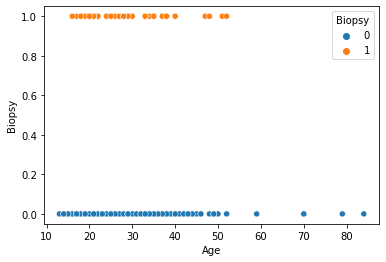

In [19]:
sns.scatterplot(x='Age',y='Biopsy',data=cancer_data,hue='Biopsy')

# Outliers treatment


In [21]:
# Userdefined function to determine the outfence and infence value so that in the presence of outliers, the range of values can be altered as per the outfence and infence
def outlier(x):
    out = []
    q1 = x.quantile(0.25)
    q3 = x.quantile(0.75)
    iqr = q3-q1
    outfence = q3+(1.5*iqr)
    infence = q1-(1.5*iqr)
    print("The outfence and infence values are %f and %f respectively" %(outfence,infence))


In [22]:
#Changing the datatype of the object type variables to float for the numerical variables
cancer_data['Number of sexual partners']=cancer_data['Number of sexual partners'].astype(float)
cancer_data['Num of pregnancies']=cancer_data['Num of pregnancies'].astype(float)
cancer_data['Smokes']=cancer_data['Smokes'].astype(float)
cancer_data['Smokes (years)']=cancer_data['Smokes (years)'].astype(float)
cancer_data['Hormonal Contraceptives']=cancer_data['Hormonal Contraceptives'].astype(float)
cancer_data['Hormonal Contraceptives (years)']=cancer_data['Hormonal Contraceptives (years)'].astype(float)
cancer_data['IUD']=cancer_data['IUD'].astype(float)
cancer_data['IUD (years)']=cancer_data['IUD (years)'].astype(float)
cancer_data['STDs']=cancer_data['STDs'].astype(float)
cancer_data['STDs (number)']=cancer_data['STDs (number)'].astype(float)

FINDING WHETHER OUTLIERS ARE PRESENT IN THE NUMERICAL VARIABLES

<AxesSubplot:xlabel='Age'>

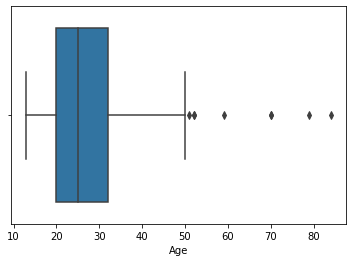

In [23]:
#Boxplot for age
sns.boxplot(x='Age',data=cancer_data)

Text(0.5, 1.0, 'Distribution of Age')

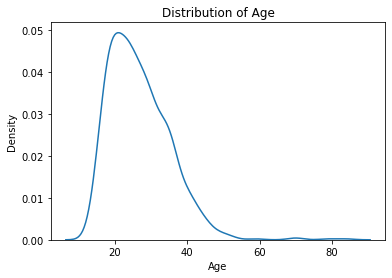

In [24]:
sns.kdeplot(cancer_data.Age).set_title('Distribution of Age')

Age has positive outliers

In [25]:
#out fence and infence values for 
age_outlier=outlier(cancer_data['Age'])
age_outlier

The outfence and infence values are 50.000000 and 2.000000 respectively


<AxesSubplot:xlabel='Number of sexual partners'>

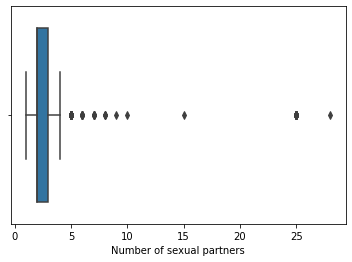

In [26]:
sns.boxplot(x='Number of sexual partners',data=cancer_data)

Number of sexual partners also has positive outliers

In [27]:
outlier(cancer_data['Number of sexual partners'])

The outfence and infence values are 4.500000 and 0.500000 respectively


<AxesSubplot:xlabel='Num of pregnancies'>

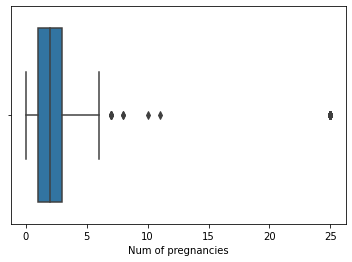

In [28]:
sns.boxplot(x='Num of pregnancies',data=cancer_data)

NO OF PREGNANCIES HAS POSITIVE OUTLIERS

In [29]:
outlier(cancer_data['Num of pregnancies'])

The outfence and infence values are 6.000000 and -2.000000 respectively


<AxesSubplot:xlabel='Smokes (years)'>

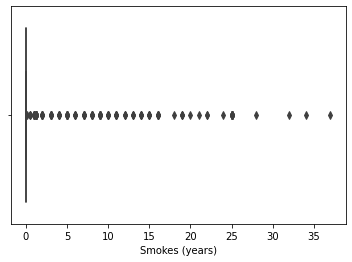

In [30]:
sns.boxplot(x='Smokes (years)',data=cancer_data)

In [31]:
outlier(cancer_data['Smokes (years)'])

The outfence and infence values are 0.000000 and 0.000000 respectively


<AxesSubplot:xlabel='Hormonal Contraceptives (years)'>

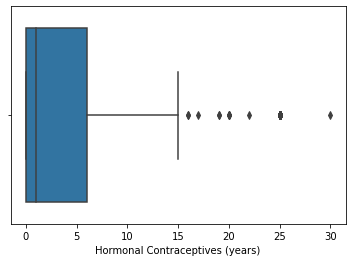

In [32]:
sns.boxplot(x='Hormonal Contraceptives (years)',data=cancer_data)

HORMONAL CONTRACEPTIVES (YEARS) HAS POSITIVE OUTLIERS

In [34]:
outlier(cancer_data['Hormonal Contraceptives (years)'])

The outfence and infence values are 15.000000 and -9.000000 respectively


HORMONAL CONTRACEPTIVES HAS NO  OUTLIERS

<AxesSubplot:xlabel='IUD (years)'>

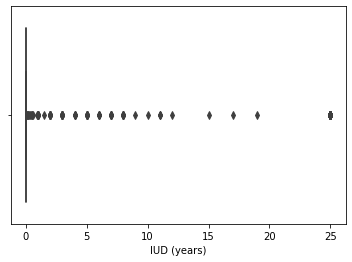

In [35]:
sns.boxplot(x='IUD (years)',data=cancer_data)

<AxesSubplot:xlabel='STDs (number)'>

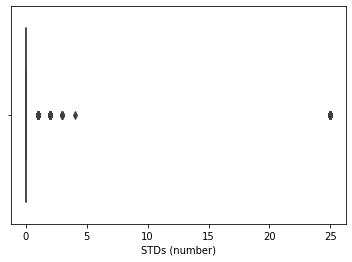

In [37]:
sns.boxplot(x='STDs (number)',data=cancer_data)

HANDLING OUTLIERS FOR AGE, NUMBER OF SEXUAL PARTNERS, NUMBER OF PREGANNCIES, HORMONAL CONTRACEPTIVE YEARS

In [39]:
#outlier treatment for the variable--Age 
cancer_data['Age'] = np.where(cancer_data['Age'] > 50, 50, cancer_data['Age'])
#outlier treatment for the variable--Number of sexual partners 
cancer_data['Number of sexual partners'] = np.where(cancer_data['Number of sexual partners'] > 4.5, 4, cancer_data['Number of sexual partners'])
#outlier treatment for the variable--Number of pregancies
cancer_data['Num of pregnancies'] = np.where(cancer_data['Num of pregnancies'] > 6, 6, cancer_data['Num of pregnancies'])
#outlier treatment for the variable--'Hormonal Contraceptives (years)'
cancer_data['Hormonal Contraceptives (years)'] = np.where(cancer_data['Hormonal Contraceptives (years)'] > 15, 15, cancer_data['Hormonal Contraceptives (years)'])

<AxesSubplot:xlabel='Age'>

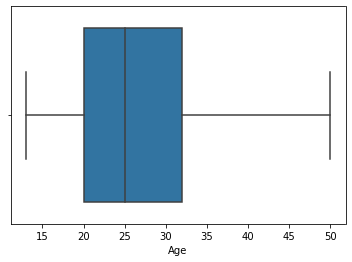

In [40]:
sns.boxplot(x='Age',data=cancer_data)

<AxesSubplot:xlabel='Number of sexual partners'>

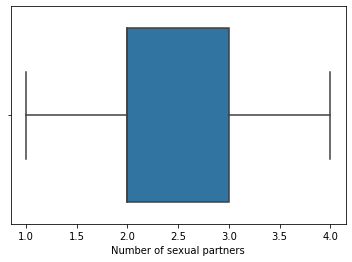

In [41]:
sns.boxplot(x='Number of sexual partners',data=cancer_data)


<AxesSubplot:xlabel='Num of pregnancies'>

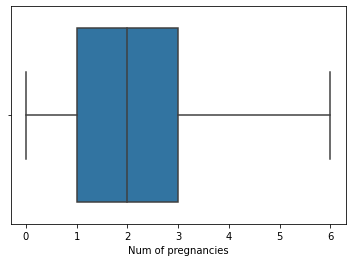

In [42]:
sns.boxplot(x='Num of pregnancies',data=cancer_data)

<AxesSubplot:xlabel='Hormonal Contraceptives (years)'>

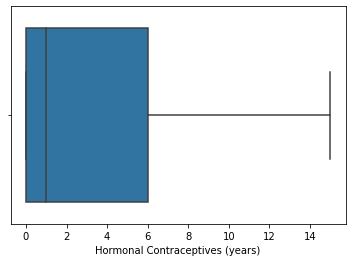

In [43]:
sns.boxplot(x='Hormonal Contraceptives (years)',data=cancer_data)

THE OUTLIERS HAVE BEEN TREATED EFFECTIVELY

In [44]:
# how many positive and negative biopsy results were observed in the dataset
cancer_data['Biopsy'].value_counts()

0    803
1     55
Name: Biopsy, dtype: int64

The data is heavily unbalanced with most of the observations belong to class 0. We can overcome this by performing SMOTE before which we can separate the datset into train and test variable



# SMOTE

In [45]:
#Splitting into x and y variables
x=cancer_data.iloc[:,:-1]
y=cancer_data.iloc[:,-1]


In [46]:
#train test split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

print("Shape of x_train dataset: ", x_train.shape)
print("Shape of y_train dataset: ", y_train.shape)
print("Shape of X_test dataset: ", x_test.shape)
print("Shape of y_test dataset: ", y_test.shape)

Shape of x_train dataset:  (600, 14)
Shape of y_train dataset:  (600,)
Shape of X_test dataset:  (258, 14)
Shape of y_test dataset:  (258,)


In [47]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 42
Before OverSampling, counts of label '0': 558 



In [48]:
#SMOTE==oversampling technique
smt = SMOTE()
x_train, y_train = smt.fit_resample(x_train, y_train)
print('After OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train==0)))

After OverSampling, the shape of train_X: (1116, 14)
After OverSampling, the shape of train_y: (1116,) 

After OverSampling, counts of label '1': 558
After OverSampling, counts of label '0': 558


THE DATASET IS BALANCED  

In [49]:
# Standardising the dataset
sc=StandardScaler().fit(x_train)
sc_train_array=sc.transform(x_train)
sc_train=pd.DataFrame(data=sc_train_array,columns=x_train.columns)
sc_test_array=sc.transform(x_test)
sc_test=pd.DataFrame(data=sc_test_array,columns=x_test.columns)

# LOGISTIC REGRESSION

AN IMPORTANT ASSUMPTION OF LOGISTIC REGRESSION IS THAT THE DATA SHOULD BE FREE FROM MULTICOLLINEARITY WHICH WE WILL DETERMINE USING VARIANCE INFLATION FACTOR

In [50]:
vif=[]
for i in range(x_train.shape[1]):
    v=variance_inflation_factor(x_train.values,i)
    vif.append(v)

In [51]:
#vif
vif_df=pd.DataFrame()
vif_df['vif_values']=vif
vif_df['variables']=x_train.columns
vif_df

,vif_values,variables
0,2.266433,Smokes
1,4.156064,Hormonal Contraceptives
2,1.489688,IUD
3,1.381548,STDs
4,1.546752,Hinselmann
5,2.865268,Schiller
6,1.152859,Citology
7,12.479779,Age
8,6.893022,Number of sexual partners
9,5.365528,Num of pregnancies


Age , number of sexual patners and number of preganacies have high values of VIF. This can be overcome by apllying pca

In [52]:
#Applying pca
from sklearn.decomposition import PCA
pc=PCA().fit(sc_train)
pc_train_array=pc.transform(sc_train)
pc_test_array=pc.transform(sc_test)

In [53]:
pc.explained_variance_ratio_.cumsum()

array([0.18016972, 0.34038556, 0.46001416, 0.55776933, 0.63787745,
       0.70973127, 0.77154023, 0.82837919, 0.87637033, 0.91795726,
       0.94702006, 0.97055936, 0.98944848, 1.        ])

95 % of the variance is explained 11 pcs. We can ignore the rest

In [54]:
pc_train=pd.DataFrame(data=pc_train_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])
pc_test=pd.DataFrame(data=pc_test_array,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11','PC12','PC13','PC14'])

In [55]:
pc_train=pc_train[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']]
pc_test=pc_test[['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']]

In [56]:
vif=[]
for i in range(pc_train.shape[1]):
    v=variance_inflation_factor(pc_train.values,i)
    vif.append(v)
vif_df=pd.DataFrame()
vif_df['vif_values']=vif
vif_df['variables']=pc_train.columns
vif_df

,vif_values,variables
0,1.0,PC1
1,1.0,PC2
2,1.0,PC3
3,1.0,PC4
4,1.0,PC5
5,1.0,PC6
6,1.0,PC7
7,1.0,PC8
8,1.0,PC9
9,1.0,PC10


In [57]:
logimodel=LogisticRegression()
logimodel.fit(pc_train,y_train)

LogisticRegression()

In [58]:
#prediction probability
pred_train=logimodel.predict_proba(pc_train)
pred_test=logimodel.predict_proba(pc_test)

#final prediction--train data
out_class_train=[]
for i in pred_train:
    max_value=i.max()
    pos= list(i).index(max_value)
    out_class_train.append(pos)
    
#final prediction--test data
out_class_test=[]
for i in pred_test:
    max_value=i.max()
    pos= list(i).index(max_value)
    out_class_test.append(pos)

In [59]:
# PERFORMANCE METRIC
print(classification_report(y_train,out_class_train))

              precision    recall  f1-score   support

           0       0.87      0.92      0.90       558
           1       0.92      0.86      0.89       558

    accuracy                           0.89      1116
   macro avg       0.89      0.89      0.89      1116
weighted avg       0.89      0.89      0.89      1116



In [60]:
print(classification_report(y_test,out_class_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       245
           1       0.39      0.85      0.54        13

    accuracy                           0.93       258
   macro avg       0.69      0.89      0.75       258
weighted avg       0.96      0.93      0.94       258



AUC =  0.8924731182795699


Text(0.5, 0, 'False Positive Rate')

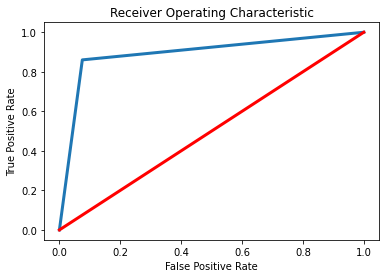

In [61]:
#Plotting ROC curve to alter the threshold
from sklearn.metrics import roc_curve,auc
fpr,tpr,thresholds=roc_curve(y_train,out_class_train)
#auc--area under curve
print("AUC = ",auc(fpr,tpr))
plt.plot(fpr,tpr,lw=3) 
plt.plot([0,1],[0,1],color='red',lw=3 )
plt.title('Receiver Operating Characteristic')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

The area under the curve is found to be 89%

HYPERPARAMETER TUNING 

In [131]:
from sklearn.model_selection import GridSearchCV
grid={'penalty':['l2','l1'],'solver':['lgbfs','liblinear','newton-cg','sag'],'C':[1,5,10,0.1,100]}
lr=LogisticRegression(max_iter=500,n_jobs=-1)
clf=GridSearchCV(estimator=lr,cv=10,param_grid=grid)
clf.fit(pc_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lgbfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lgbfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lgbfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lgbfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lgbfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1306, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 434, in _check_solver
    raise ValueError("Logistic Regression supports only solvers in %s, got"
ValueError: Logistic Regression supports only solvers in ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'], got lgbfs.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib

GridSearchCV(cv=10, estimator=LogisticRegression(max_iter=500, n_jobs=-1),
             param_grid={'C': [1, 5, 10, 0.1, 100], 'penalty': ['l2', 'l1'],
                         'solver': ['lgbfs', 'liblinear', 'newton-cg', 'sag']})

In [132]:
clf.best_params_

{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}

In [138]:
lr=LogisticRegression(penalty='l1',max_iter=500, C=1,solver='liblinear',n_jobs=-1 )
lr.fit(pc_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1355: UserWarning: 'n_jobs' > 1 does not have any effect when 'solver' is set to 'liblinear'. Got 'n_jobs' = 8.
  warnings.warn("'n_jobs' > 1 does not have any effect when"


LogisticRegression(C=1, max_iter=500, n_jobs=-1, penalty='l1',
                   solver='liblinear')

In [139]:
#prediction probability
pred_train=lr.predict_proba(pc_train)
pred_test=lr.predict_proba(pc_test)

#final prediction--train data
out_class_train=[]
for i in pred_train:
    max_value=i.max()
    pos= list(i).index(max_value)
    out_class_train.append(pos)
    
#final prediction--test data
out_class_test=[]
for i in pred_test:
    max_value=i.max()
    pos= list(i).index(max_value)
    out_class_test.append(pos)

In [140]:
# PERFORMANCE METRIC
print(classification_report(y_train,out_class_train))
print(classification_report(y_test,out_class_test))

              precision    recall  f1-score   support

           0       0.86      0.93      0.89       558
           1       0.92      0.85      0.88       558

    accuracy                           0.89      1116
   macro avg       0.89      0.89      0.89      1116
weighted avg       0.89      0.89      0.89      1116

              precision    recall  f1-score   support

           0       0.99      0.94      0.97       245
           1       0.44      0.85      0.58        13

    accuracy                           0.94       258
   macro avg       0.72      0.89      0.77       258
weighted avg       0.96      0.94      0.95       258



# K Nearest neighbours

In [27]:
knn_model=KNeighborsClassifier()
knn_model.fit(sc_train,y_train)

KNeighborsClassifier()

In [28]:
pred_train=knn_model.predict(sc_train)
pred_test=knn_model.predict(sc_test)

In [182]:
pred_train

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [29]:
# PERFORMANCE METRIC
print(classification_report(y_train,pred_train))
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       558
           1       0.95      0.99      0.97       558

    accuracy                           0.97      1116
   macro avg       0.97      0.97      0.97      1116
weighted avg       0.97      0.97      0.97      1116

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       245
           1       0.35      0.85      0.50        13

    accuracy                           0.91       258
   macro avg       0.67      0.88      0.73       258
weighted avg       0.96      0.91      0.93       258



OPTIMIZATION-- HYPERPARAMETER TUNING(KNN)


In [70]:
knn_model.get_params(deep=True)

{'algorithm': 'brute',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 99,
 'p': 2,
 'weights': 'uniform'}

In [38]:
from sklearn.metrics import confusion_matrix
train_accu = []
test_accu = []
neighbours=list(range(1,100))
algo=['ball_tree', 'kd_tree', 'brute']
count=-1
for i in neighbours:
    for j in algo:
        knn_model=KNeighborsClassifier(n_neighbors=i,algorithm=j).fit(sc_train,y_train)
        pred_train=knn_model.predict(sc_train)
        pred_test=knn_model.predict(sc_test)
        conf_train=confusion_matrix(y_train,pred_train)
        conf_test=confusion_matrix(y_test,pred_test)
        acc_train=conf_train.diagonal().sum()/conf_train.sum()
        acc_test=conf_test.diagonal().sum()/conf_test.sum()
        count+=1
        train_accu.append(acc_train)
        test_accu.append(acc_test)
        print('accuracy of train is : %f and test is : %f when algorithm is %s and num of neighbours is %i and count %i' %(acc_train,acc_test,j,i,count))

accuracy of train is : 1.000000 and test is : 0.903101 when algorithm is ball_tree and num of neighbours is 1 and count 0
accuracy of train is : 1.000000 and test is : 0.903101 when algorithm is kd_tree and num of neighbours is 1 and count 1
accuracy of train is : 1.000000 and test is : 0.903101 when algorithm is brute and num of neighbours is 1 and count 2
accuracy of train is : 0.988351 and test is : 0.922481 when algorithm is ball_tree and num of neighbours is 2 and count 3
accuracy of train is : 0.988351 and test is : 0.922481 when algorithm is kd_tree and num of neighbours is 2 and count 4
accuracy of train is : 0.988351 and test is : 0.922481 when algorithm is brute and num of neighbours is 2 and count 5
accuracy of train is : 0.976703 and test is : 0.918605 when algorithm is ball_tree and num of neighbours is 3 and count 6
accuracy of train is : 0.976703 and test is : 0.918605 when algorithm is kd_tree and num of neighbours is 3 and count 7
accuracy of train is : 0.976703 and te

accuracy of train is : 0.896953 and test is : 0.856589 when algorithm is ball_tree and num of neighbours is 24 and count 69
accuracy of train is : 0.896953 and test is : 0.856589 when algorithm is kd_tree and num of neighbours is 24 and count 70
accuracy of train is : 0.896953 and test is : 0.856589 when algorithm is brute and num of neighbours is 24 and count 71
accuracy of train is : 0.892473 and test is : 0.852713 when algorithm is ball_tree and num of neighbours is 25 and count 72
accuracy of train is : 0.892473 and test is : 0.852713 when algorithm is kd_tree and num of neighbours is 25 and count 73
accuracy of train is : 0.892473 and test is : 0.852713 when algorithm is brute and num of neighbours is 25 and count 74
accuracy of train is : 0.890681 and test is : 0.856589 when algorithm is ball_tree and num of neighbours is 26 and count 75
accuracy of train is : 0.890681 and test is : 0.856589 when algorithm is kd_tree and num of neighbours is 26 and count 76
accuracy of train is :

accuracy of train is : 0.871864 and test is : 0.817829 when algorithm is ball_tree and num of neighbours is 47 and count 138
accuracy of train is : 0.871864 and test is : 0.817829 when algorithm is kd_tree and num of neighbours is 47 and count 139
accuracy of train is : 0.871864 and test is : 0.817829 when algorithm is brute and num of neighbours is 47 and count 140
accuracy of train is : 0.875448 and test is : 0.833333 when algorithm is ball_tree and num of neighbours is 48 and count 141
accuracy of train is : 0.875448 and test is : 0.833333 when algorithm is kd_tree and num of neighbours is 48 and count 142
accuracy of train is : 0.875448 and test is : 0.833333 when algorithm is brute and num of neighbours is 48 and count 143
accuracy of train is : 0.870072 and test is : 0.810078 when algorithm is ball_tree and num of neighbours is 49 and count 144
accuracy of train is : 0.870072 and test is : 0.810078 when algorithm is kd_tree and num of neighbours is 49 and count 145
accuracy of tr

accuracy of train is : 0.866487 and test is : 0.806202 when algorithm is kd_tree and num of neighbours is 69 and count 205
accuracy of train is : 0.866487 and test is : 0.806202 when algorithm is brute and num of neighbours is 69 and count 206
accuracy of train is : 0.863799 and test is : 0.817829 when algorithm is ball_tree and num of neighbours is 70 and count 207
accuracy of train is : 0.863799 and test is : 0.817829 when algorithm is kd_tree and num of neighbours is 70 and count 208
accuracy of train is : 0.863799 and test is : 0.817829 when algorithm is brute and num of neighbours is 70 and count 209
accuracy of train is : 0.867384 and test is : 0.810078 when algorithm is ball_tree and num of neighbours is 71 and count 210
accuracy of train is : 0.867384 and test is : 0.810078 when algorithm is kd_tree and num of neighbours is 71 and count 211
accuracy of train is : 0.867384 and test is : 0.810078 when algorithm is brute and num of neighbours is 71 and count 212
accuracy of train 

accuracy of train is : 0.852151 and test is : 0.829457 when algorithm is brute and num of neighbours is 91 and count 272
accuracy of train is : 0.853943 and test is : 0.833333 when algorithm is ball_tree and num of neighbours is 92 and count 273
accuracy of train is : 0.853943 and test is : 0.833333 when algorithm is kd_tree and num of neighbours is 92 and count 274
accuracy of train is : 0.853943 and test is : 0.833333 when algorithm is brute and num of neighbours is 92 and count 275
accuracy of train is : 0.853047 and test is : 0.829457 when algorithm is ball_tree and num of neighbours is 93 and count 276
accuracy of train is : 0.853047 and test is : 0.829457 when algorithm is kd_tree and num of neighbours is 93 and count 277
accuracy of train is : 0.853047 and test is : 0.829457 when algorithm is brute and num of neighbours is 93 and count 278
accuracy of train is : 0.853943 and test is : 0.829457 when algorithm is ball_tree and num of neighbours is 94 and count 279
accuracy of trai

In [39]:
len(train_accu),len(test_accu)

(297, 297)

In [37]:
#visualization to choose the best combination
%matplotlib inline
plt.plot(range(1,298),train_accu, label='Accuracy of Train')
plt.plot(range(1,298), test_accu, label = 'Accuracy of Test')
plt.legend()
plt.xlabel('count')
plt.ylabel('Accuracy of the Model')
plt.show()

HIGHEST ACCURACY WITH MINIMUM GAP IS OBSERVED AT COUNT 10 WHICH CORRESPONDS TO algorithm-- kd_tree and num of neighbours-4

In [40]:
#final model
knn_final_model=KNeighborsClassifier(n_neighbors=4,algorithm='kd_tree',n_jobs=-1)
knn_final_model.fit(sc_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=4)

In [42]:
# PERFORMANCE METRIC
pred_train=knn_final_model.predict(sc_train)
pred_test=knn_final_model.predict(sc_test)
print(classification_report(y_train,pred_train))
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       558
           1       0.97      0.98      0.98       558

    accuracy                           0.97      1116
   macro avg       0.98      0.97      0.97      1116
weighted avg       0.98      0.97      0.97      1116

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       245
           1       0.38      0.69      0.49        13

    accuracy                           0.93       258
   macro avg       0.68      0.82      0.72       258
weighted avg       0.95      0.93      0.94       258



 # SVM
 

In [43]:
svm_linear=SVC(kernel='linear')
svm_linear.fit(sc_train,y_train)

SVC(kernel='linear')

In [44]:
# model prediction for train and test
pred_train=svm_linear.predict(sc_train)
pred_test=svm_linear.predict(sc_test)

In [46]:
# PERFORMANCE METRIC
print(classification_report(y_train,pred_train))
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.82      0.96      0.89       558
           1       0.95      0.79      0.86       558

    accuracy                           0.88      1116
   macro avg       0.89      0.88      0.87      1116
weighted avg       0.89      0.88      0.87      1116

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       245
           1       0.69      0.85      0.76        13

    accuracy                           0.97       258
   macro avg       0.84      0.91      0.87       258
weighted avg       0.98      0.97      0.97       258



HYPERPARAMETER TUNING--SVM 

In [54]:
kernel=['linear','rbf','poly','sigmoid']
cost=list(range(1,21))
train_accu=[]
test_accu=[]
count=-1
for i in kernel:
    for j in cost:
        svm_model=SVC(kernel=i,C=j).fit(sc_train,y_train)
        pred_train=svm_model.predict(sc_train)
        pred_test=svm_model.predict(sc_test)
        conf_train=confusion_matrix(y_train,pred_train)
        conf_test=confusion_matrix(y_test,pred_test)
        acc_train=conf_train.diagonal().sum()/conf_train.sum()
        acc_test=conf_test.diagonal().sum()/conf_test.sum()
        count+=1
        train_accu.append(acc_train)
        test_accu.append(acc_test)
        print('accuracy of train is : %f and test is : %f when kernel is %s and cost is %i and count %i' %(acc_train,acc_test,i,j,count))

accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 1 and count 0
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 2 and count 1
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 3 and count 2
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 4 and count 3
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 5 and count 4
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 6 and count 5
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 7 and count 6
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 8 and count 7
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is linear and cost is 9 and count 8
accuracy of train is : 0.875448 and test is : 0.972868 when kernel is lin

In [57]:
#visualization to choose the best combination
%matplotlib qt
plt.plot(range(1,81),train_accu, label='Accuracy of Train')
plt.plot(range(1,81), test_accu, label = 'Accuracy of Test')
plt.legend()
plt.xlabel('count')
plt.ylabel('Accuracy of the Model')
plt.show()

count 24 gives best combination when kernel is rbf and cost is 5 

In [58]:
svm_final=SVC(kernel='rbf',C=5)
svm_final.fit(sc_train,y_train)

SVC(C=5)

In [59]:
# PERFORMANCE METRIC
pred_train=svm_final.predict(sc_train)
pred_test=svm_final.predict(sc_test)
print(classification_report(y_train,pred_train))
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       558
           1       0.98      0.97      0.98       558

    accuracy                           0.98      1116
   macro avg       0.98      0.98      0.98      1116
weighted avg       0.98      0.98      0.98      1116

              precision    recall  f1-score   support

           0       0.98      0.96      0.97       245
           1       0.47      0.69      0.56        13

    accuracy                           0.95       258
   macro avg       0.73      0.83      0.77       258
weighted avg       0.96      0.95      0.95       258



# NAIVE BAYES

In [63]:
from sklearn.naive_bayes import BernoulliNB
gnb=BernoulliNB()
gnb.fit(sc_train,y_train)

BernoulliNB()

In [64]:
# model prediction for train and test
pred_train=gnb.predict_proba(sc_train)
pred_test=gnb.predict_proba(sc_test)

#final prediction--train data
out_class_train=[]
for i in pred_train:
    max_value=i.max()
    pos= list(i).index(max_value)
    out_class_train.append(pos)
    
#final prediction--test data
out_class_test=[]
for i in pred_test:
    max_value=i.max()
    pos= list(i).index(max_value)
    out_class_test.append(pos)

In [65]:
# PERFORMANCE METRIC
print(classification_report(y_train,out_class_train))
print(classification_report(y_test,out_class_test))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       558
           1       0.91      0.81      0.85       558

    accuracy                           0.86      1116
   macro avg       0.87      0.86      0.86      1116
weighted avg       0.87      0.86      0.86      1116

              precision    recall  f1-score   support

           0       0.99      0.94      0.96       245
           1       0.42      0.77      0.54        13

    accuracy                           0.93       258
   macro avg       0.70      0.86      0.75       258
weighted avg       0.96      0.93      0.94       258



HYPERPARAMETER TUNING FOR NAIVE BAYES

In [68]:
gnb.get_params(deep=True)

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

# Random forest classifier


In [83]:
rf=RandomForestClassifier(oob_score=True)
rf.fit(sc_train,y_train)

RandomForestClassifier(oob_score=True)

In [84]:
rf_pred_train=rf.predict(sc_train)
rf_pred_test=rf.predict(sc_test)

In [85]:
# PERFORMANCE METRIC
print(classification_report(y_train,rf_pred_train))
print(classification_report(y_test,rf_pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       558
           1       1.00      1.00      1.00       558

    accuracy                           1.00      1116
   macro avg       1.00      1.00      1.00      1116
weighted avg       1.00      1.00      1.00      1116

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       245
           1       0.73      0.62      0.67        13

    accuracy                           0.97       258
   macro avg       0.85      0.80      0.83       258
weighted avg       0.97      0.97      0.97       258



The performance is found to be best in Random Forest classifier with having the highest accuracy